In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("output/5_combined.csv").set_index(["City","report_year"])

# Drop rows where there is no grant payment record
# These could be towns with regional districts or no schools
df = df[df["Grant Payments"].notnull()]

df.head()

FTE Count has_nulls  Education spending  Inter_Gov_Rev  \
City    report_year                                                           
ANSONIA 2004               NaN       NaN                 NaN            NaN   
        2005               NaN       NaN                 NaN            NaN   
        2006               NaN       NaN                 NaN            NaN   
        2007             489.8     False          29660930.0     24511137.0   
        2008             391.9     False          38418010.0     32920804.0   

                     Enrollment  Grant Payments  
City    report_year                              
ANSONIA 2004                NaN      11971916.0  
        2005                NaN      12208280.0  
        2006                NaN      12777406.0  
        2007            2831.14      12841646.0  
        2008            2867.43      14394773.0

# Adjust columns by student

In [3]:
def adjust_col_by_enrollment(df, col):
    ret = df.copy()
    ret[col.lower().strip().replace(" ","_") + "_per_student"] = ret[col] / ret["Enrollment"]
    return ret
    
for c in ["FTE Count", "Education spending","Inter_Gov_Rev", "Grant Payments"]:
    df = adjust_col_by_enrollment(df, c)
    
df

FTE Count has_nulls  Education spending  Inter_Gov_Rev  \
City      report_year                                                           
ANSONIA   2004               NaN       NaN                 NaN            NaN   
          2005               NaN       NaN                 NaN            NaN   
          2006               NaN       NaN                 NaN            NaN   
          2007             489.8     False          29660930.0     24511137.0   
          2008             391.9     False          38418010.0     32920804.0   
          2009             404.5     False          31520992.0     26302924.0   
          2010             373.2     False          32282747.0     26465983.0   
          2011             399.6     False          31895845.0     27166329.0   
          2012             389.6     False          33764768.0     26864426.0   
          2013             376.7     False          34124712.0     29957368.0   
          2014             391.7     False          35784832.0     28229568.0   
          2015             347.2     False          37029834.0     27853347.0   
          2016             353.5     False          38507977.0     29372130.0   
          2017               NaN       NaN                 NaN            NaN   
          2018               NaN       NaN                 NaN            NaN   
AVON      2004               NaN       NaN                 NaN            NaN   
          2005               NaN       NaN                 NaN            NaN   
          2006               NaN       NaN                 NaN            NaN   
          2007             458.6     False          38966040.0      4265347.0   
          2008             465.6     False          54645090.0     18352155.0   
          2009             506.8     False          44212809.0      5662776.0   
          2010             498.8     False          45144616.0      5477312.0   
          2011             516.0     False          46977726.0      5710137.0   
          2012             533.0     False          51292289.0     10519982.0   
          2013             527.3     False          53396764.0      8450231.0   
          2014             507.9     False          56632683.0     10344758.0   
          2015             510.5     False          58148061.0      9442455.0   
          2016             509.3     False          59484885.0      9949386.0   
          2017               NaN       NaN                 NaN            NaN   
          2018               NaN       NaN                 NaN            NaN   
...                          ...       ...                 ...            ...   
WOLCOTT   2004               NaN       NaN                 NaN            NaN   
          2005               NaN       NaN                 NaN            NaN   
          2006               NaN       NaN                 NaN            NaN   
          2007             446.3     False          31757375.0     16587400.0   
          2008             454.3     False          42421162.0     27835970.0   
          2009             446.3     False          34412326.0     19137742.0   
          2010             434.0      True          32891047.0     16944344.0   
          2011             425.0     False          32768203.0     17156857.0   
          2012             412.2     False          35565637.0     19263593.0   
          2013             411.3     False          36419835.0     20168083.0   
          2014             396.1     False          37034923.0     20711146.0   
          2015             406.6     False          37739030.0     20699671.0   
          2016             401.2     False          37563529.0     20092505.0   
          2017               NaN       NaN                 NaN            NaN   
          2018               NaN       NaN                 NaN            NaN   
WOODSTOCK 2004               NaN       NaN                 NaN            NaN   
          2005               NaN       NaN            

# Some summary analysis

Let's look at the overall trends in the following:

    1. Enrollment 
    2. Staffing (fte_count_per_student)
    3. Education spending (education_spending_per_student)
    4. Education grants (grant_payments_per_student)
    5. All aid (not just education) - inter_gov_rev_per_student



In [4]:
total_df = df.groupby("report_year").agg({
    "Inter_Gov_Rev":'sum',
    "Education spending":'sum',
    "Grant Payments":'sum',
    "FTE Count":'sum',
    'Enrollment':'sum'
})

%matplotlib inline


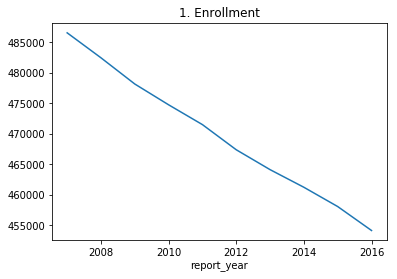

In [5]:
total_df[total_df["Enrollment"] > 0]["Enrollment"].plot(
    title="1. Enrollment"   
)

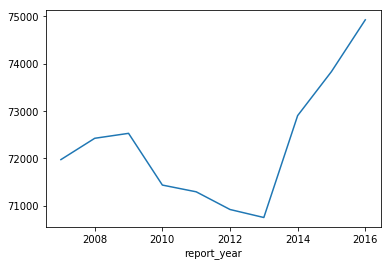

In [47]:
total_df[total_df["FTE Count"] > 0]["FTE Count"].plot()

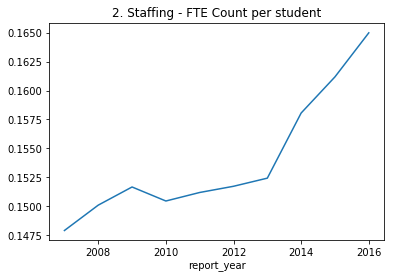

In [6]:
adjust_col_by_enrollment(total_df, "FTE Count")["fte_count_per_student"].plot(
    title="2. Staffing - FTE Count per student"   
)

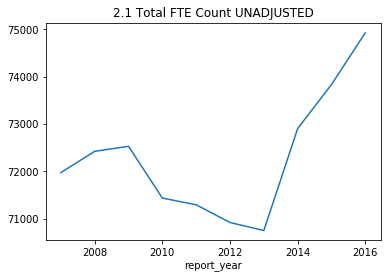

In [7]:
total_df[total_df["FTE Count"] > 0]["FTE Count"].plot(
    title="2.1 Total FTE Count UNADJUSTED"   
)

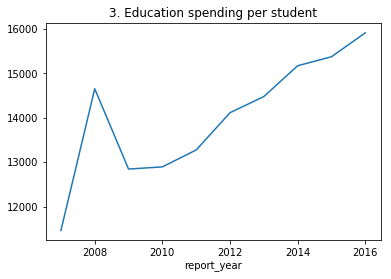

In [8]:
adjust_col_by_enrollment(total_df, "Education spending")["education_spending_per_student"].plot(
    title="3. Education spending per student"   
)

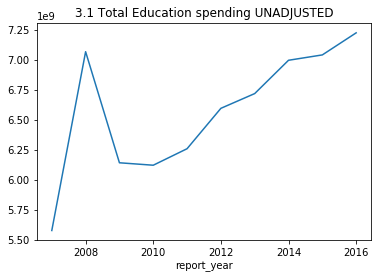

In [9]:
total_df[total_df["Education spending"] > 0]["Education spending"].plot(
    title="3.1 Total Education spending UNADJUSTED"   
)

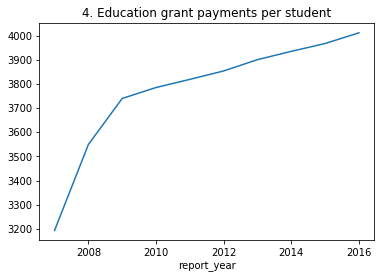

In [10]:
adjust_col_by_enrollment(total_df, "Grant Payments")["grant_payments_per_student"].plot(
    title="4. Education grant payments per student"   
)

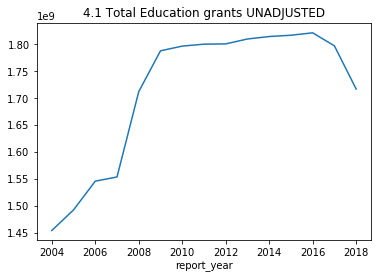

In [11]:
total_df["Grant Payments"].plot(
    title="4.1 Total Education grants UNADJUSTED"   
)

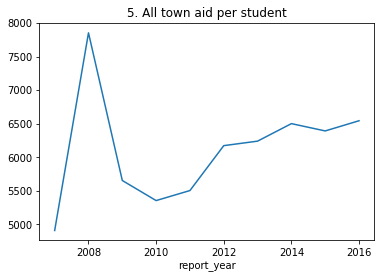

In [12]:
adjust_col_by_enrollment(total_df, "Inter_Gov_Rev")["inter_gov_rev_per_student"].plot(
    title="5. All town aid per student"
)

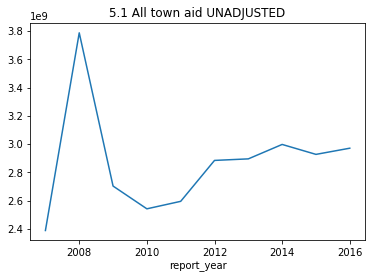

In [13]:
total_df[total_df["Inter_Gov_Rev"] > 0]["Inter_Gov_Rev"].plot(
    title="5.1 All town aid UNADJUSTED" 
)

## Adjust revenue sources as percentage of education spending

In order to reflect how dependent districts are on the revenue, we need to represent it as a percentage of their overall education spending. 

Remember, the two revenue sources are:
    
    1. Grant Payments (education related)
    2. inter_gov_rev (this is federal and state aid not specific to education)
    
We're going to add columns that end with the suffix:

    _pct_of_budget

And we're going to continue to use the per_student adjusted columns

In [14]:
def add_pct_of_spending(df, col):
    ret = df.copy()
    
    ret[col + "_pct_spending"] = ret[col] / ret["education_spending_per_student"]
    
    return ret


for c in [
    "inter_gov_rev_per_student",
    "grant_payments_per_student"
]:
    df = add_pct_of_spending(df, c)
    
df.head()

FTE Count has_nulls  Education spending  Inter_Gov_Rev  \
City    report_year                                                           
ANSONIA 2004               NaN       NaN                 NaN            NaN   
        2005               NaN       NaN                 NaN            NaN   
        2006               NaN       NaN                 NaN            NaN   
        2007             489.8     False          29660930.0     24511137.0   
        2008             391.9     False          38418010.0     32920804.0   

                     Enrollment  Grant Payments  fte_count_per_student  \
City    report_year                                                      
ANSONIA 2004                NaN      11971916.0                    NaN   
        2005                NaN      12208280.0                    NaN   
        2006                NaN      12777406.0                    NaN   
        2007            2831.14      12841646.0               0.173005   
        2008            2867.43      14394773.0               0.136673   

                     education_spending_per_student  \
City    report_year                                   
ANSONIA 2004                                    NaN   
        2005                                    NaN   
        2006                                    NaN   
        2007                           10476.673707   
        2008                           13398.063771   

                     inter_gov_rev_per_student  grant_payments_per_student  \
City    report_year                                                          
ANSONIA 2004                               NaN                         NaN   
        2005                               NaN                         NaN   
        2006                               NaN                         NaN   
        2007                       8657.691601                 4535.856934   
        2008                      11480.944260                 5020.095695   

                     inter_gov_rev_per_student_pct_spending  \
City    report_year                                           
ANSONIA 2004                                            NaN   
        2005                                            NaN   
        2006                                            NaN   
        2007                                       0.826378   
        2008                                       0.856911   

                     grant_payments_per_student_pct_spending  
City    report_year                                           
ANSONIA 2004                                             NaN  
        2005                                             NaN  
        2006                                             NaN  
        2007                                        0.432948  
        2008                                        0.374688

In [18]:
def add_pct_change(df, col):
    ret = df.copy()
    ret[col + "_pct_change"] = ret[col].pct_change()
    ret[col + "_diff"] = ret[col].diff()

    return ret

for c in [
    "inter_gov_rev_per_student_pct_spending",
    "grant_payments_per_student_pct_spending"
]:
    df = add_pct_change(df, c)

df.head()

FTE Count has_nulls  Education spending  Inter_Gov_Rev  \
City    report_year                                                           
ANSONIA 2004               NaN       NaN                 NaN            NaN   
        2005               NaN       NaN                 NaN            NaN   
        2006               NaN       NaN                 NaN            NaN   
        2007             489.8     False          29660930.0     24511137.0   
        2008             391.9     False          38418010.0     32920804.0   

                     Enrollment  Grant Payments  fte_count_per_student  \
City    report_year                                                      
ANSONIA 2004                NaN      11971916.0                    NaN   
        2005                NaN      12208280.0                    NaN   
        2006                NaN      12777406.0                    NaN   
        2007            2831.14      12841646.0               0.173005   
        2008            2867.43      14394773.0               0.136673   

                     education_spending_per_student  \
City    report_year                                   
ANSONIA 2004                                    NaN   
        2005                                    NaN   
        2006                                    NaN   
        2007                           10476.673707   
        2008                           13398.063771   

                     inter_gov_rev_per_student  grant_payments_per_student  \
City    report_year                                                          
ANSONIA 2004                               NaN                         NaN   
        2005                               NaN                         NaN   
        2006                               NaN                         NaN   
        2007                       8657.691601                 4535.856934   
        2008                      11480.944260                 5020.095695   

                     inter_gov_rev_per_student_pct_spending  \
City    report_year                                           
ANSONIA 2004                                            NaN   
        2005                                            NaN   
        2006                                            NaN   
        2007                                       0.826378   
        2008                                       0.856911   

                     grant_payments_per_student_pct_spending  \
City    report_year                                            
ANSONIA 2004                                             NaN   
        2005                                             NaN   
        2006                                             NaN   
        2007                                        0.432948   
        2008                                        0.374688   

                     inter_gov_rev_per_student_pct_spending_pct_change  \
City    report_year                                                      
ANSONIA 2004                                                       NaN   
        2005                                                       NaN   
        2006                                                       NaN   
        2007                                                       NaN   
        2008                                                  0.036948   

                     grant_payments_per_student_pct_spending_pct_change  \
City    report_year                                                       
ANSONIA 2004                                                       NaN    
        2005                                                       NaN    
        2006                                                       NaN    
        2007                                                       NaN    
        2008                                                 -0.134566    

                     inter_gov_rev_per_student_pct_spending_diff  \
City    rep

In [35]:
print("10 biggest declines in grant payment")

df.sort_values(
    by="grant_payments_per_student_pct_spending_diff",
    ascending=True
).head(10)

10 biggest declines in grant payment


,,FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,fte_count_per_student,education_spending_per_student,inter_gov_rev_per_student,grant_payments_per_student,inter_gov_rev_per_student_pct_spending,grant_payments_per_student_pct_spending,inter_gov_rev_per_student_pct_spending_pct_change,grant_payments_per_student_pct_spending_pct_change,inter_gov_rev_per_student_pct_spending_diff,grant_payments_per_student_pct_spending_diff
City,report_year,,,,,,,,,,,,,,,,
NEW HAVEN,2008,3160.1,False,256210171.0,289221907.0,18546.95,134383737.0,0.170384,13814.140384,15594.041446,7245.597632,1.128846,0.524506,-0.050222,-0.264330,-0.059691,-0.188457
WATERBURY,2008,2819.7,False,218774000.0,206828000.0,17776.39,106431799.0,0.158621,12306.998215,11634.983256,5987.256074,0.945396,0.486492,0.022414,-0.237591,0.020726,-0.151606
HARTFORD,2008,3277.7,False,374467000.0,341042000.0,22342.55,176869463.0,0.146702,16760.262369,15264.237967,7916.261259,0.910740,0.472323,0.016260,-0.220364,0.014572,-0.133502
NEW LONDON,2008,482.9,False,52721171.0,48716788.0,3380.86,21283462.0,0.142833,15594.011879,14409.584544,6295.280491,0.924046,0.403699,0.007015,-0.200701,0.006437,-0.101367
PUTNAM,2008,232.5,False,20967049.0,14240612.0,1298.97,7723560.0,0.178988,16141.288097,10963.002995,5945.910991,0.679190,0.368367,0.159246,-0.212235,0.093301,-0.099243
NEW BRITAIN,2008,1357.0,False,160456000.0,138925000.0,10984.91,69442815.0,0.123533,14606.947167,12646.894695,6321.655344,0.865814,0.432784,0.059532,-0.185326,0.048648,-0.098452
NAUGATUCK,2008,661.3,False,73739126.0,50526650.0,5132.03,27867535.0,0.128857,14368.412889,9845.353593,5430.119271,0.685208,0.377921,0.129424,-0.193362,0.078520,-0.090593
MERIDEN,2008,1269.1,False,133749494.0,96756081.0,9621.43,50473174.0,0.131903,13901.207409,10056.309821,5245.911886,0.723413,0.377371,0.141582,-0.193100,0.089720,-0.090309
BRIDGEPORT,2011,2980.2,False,229559379.0,207535677.0,20949.07,162818647.0,0.142259,10957.974698,9906.677337,7772.118142,0.904061,0.709266,0.001592,-0.106511,0.001437,-0.084550


In [42]:
df.loc["NEW HAVEN"]["FTE Count"]#["fte_count_per_student"].plot()

report_year
2004       NaN
2005       NaN
2006       NaN
2007    3150.8
2008    3160.1
2009    3173.6
2010    3154.4
2011    3275.4
2012    3178.5
2013    3105.7
2014    4053.4
2015    3781.4
2016    3235.2
2017       NaN
2018       NaN
Name: FTE Count, dtype: float64

In [45]:
#df.loc["NEW HAVEN"]["Enrollment"]

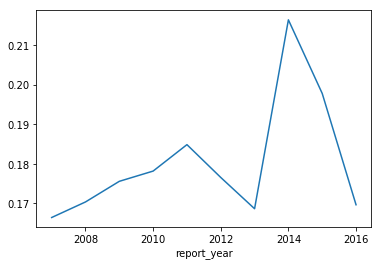

In [43]:
df.loc["NEW HAVEN"]["fte_count_per_student"].plot()

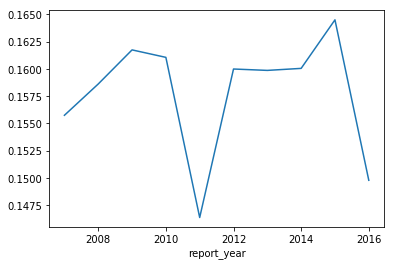

In [40]:
df.loc["WATERBURY"]["fte_count_per_student"].plot()

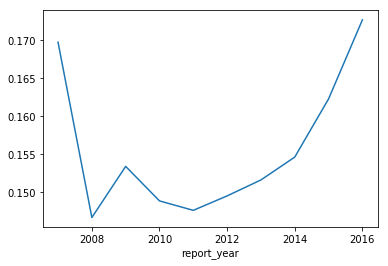

In [41]:
df.loc["HARTFORD"]["fte_count_per_student"].plot()

In [ ]:
df.loc["HARTFORD"]["fte_count_per_student"].plot()

In [38]:
print("10 biggest declines in intergov rev")

df.sort_values(
    by="inter_gov_rev_per_student_pct_spending_diff",
    ascending=True
).head(10)

10 biggest declines in intergov rev


,,FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,fte_count_per_student,education_spending_per_student,inter_gov_rev_per_student,grant_payments_per_student,inter_gov_rev_per_student_pct_spending,grant_payments_per_student_pct_spending,inter_gov_rev_per_student_pct_spending_pct_change,grant_payments_per_student_pct_spending_pct_change,inter_gov_rev_per_student_pct_spending_diff,grant_payments_per_student_pct_spending_diff
City,report_year,,,,,,,,,,,,,,,,
GLASTONBURY,2009,1042.6,False,83715229.0,9546377.0,7020.83,6050168.0,0.148501,11923.836498,1359.721999,861.745406,0.114034,0.072271,-0.682704,0.302221,-0.245359,0.016773
AVON,2009,506.8,False,44212809.0,5662776.0,3573.81,1243373.0,0.141809,12371.337312,1584.520722,347.912452,0.128080,0.028122,-0.618631,0.290101,-0.207763,0.006324
BRANFORD,2009,578.8,False,49602424.0,8247139.0,3536.87,1766972.0,0.163648,14024.384272,2331.761982,499.586357,0.166265,0.035623,-0.540578,0.308877,-0.195635,0.008406
GREENWICH,2009,1506.3,False,135519709.0,36461092.0,8760.93,3434462.0,0.171934,15468.644196,4161.783281,392.020254,0.269046,0.025343,-0.416151,0.296190,-0.191769,0.005791
SHELTON,2009,796.0,False,69732133.0,12843959.0,5646.04,4852971.0,0.140984,12350.626811,2274.861496,859.535356,0.184190,0.069594,-0.505715,0.241821,-0.188449,0.013552
DARIEN,2009,745.2,False,74728039.0,10883824.0,4714.62,1743772.0,0.158062,15850.278283,2308.526244,369.864804,0.145646,0.023335,-0.558849,0.250096,-0.184504,0.004668
RIDGEFIELD,2009,766.9,False,80923133.0,9751380.0,5586.62,1965327.0,0.137274,14485.168671,1745.488327,351.791781,0.120502,0.024286,-0.603051,0.248618,-0.183068,0.004836
WESTBROOK,2009,178.0,False,14224397.0,2729125.0,979.08,423969.0,0.181803,14528.329656,2787.438207,433.027945,0.191862,0.029806,-0.486074,0.161286,-0.181464,0.004140
FARMINGTON,2009,625.7,False,52626772.0,11010560.0,4167.67,1602067.0,0.150132,12627.384606,2641.898231,384.403516,0.209220,0.030442,-0.457446,0.294019,-0.176401,0.006917


In [27]:
df.to_csv("output/mega.csv", float_format="%.2f")

In [31]:
len(df.reset_index()["City"].unique())

122

In [33]:
122 * (2019-2004) == len(df)

True